In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('Customer_Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.drop(labels = ['RowNumber','CustomerId','Surname','Exited'],axis = 1)

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y = dataset['Exited']

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])
label2 = LabelEncoder()
X['Gender'] = label2.fit_transform(X['Gender'])

In [11]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


In [12]:
X = pd.get_dummies(X,drop_first = True,columns = ['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


<h1>Feature Standardisation</h1>

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [15]:
X_train

array([[-1.68164904, -1.09598752, -1.61355439, ..., -0.58594585,
        -0.57873591, -0.57380915],
       [-1.24708446, -1.09598752,  0.86563897, ..., -0.26099412,
        -0.57873591, -0.57380915],
       [ 0.78088358,  0.91241915, -0.85072567, ..., -1.69344784,
         1.72790383, -0.57380915],
       ...,
       [ 0.76019003,  0.91241915,  1.43776051, ...,  0.6401199 ,
         1.72790383, -0.57380915],
       [-0.7193989 , -1.09598752, -0.4693113 , ...,  0.17982435,
         1.72790383, -0.57380915],
       [ 0.79123035, -1.09598752, -0.75537207, ...,  0.37665967,
        -0.57873591,  1.74273971]])

In [16]:
model = Sequential()
model.add(Dense(X.shape[1],activation = 'relu',input_dim = X.shape[1]))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,989
Trainable params: 9,989
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
history = model.fit(X_train,y_train.to_numpy(),batch_size = 10,epochs = 10,verbose = 1,validation_split = 0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/10
7200/7200 [==============================] - 2s 300us/sample - loss: 0.4691 - acc: 0.7994 - val_loss: 0.4493 - val_acc: 0.7912
Epoch 2/10
7200/7200 [==============================] - 2s 302us/sample - loss: 0.4193 - acc: 0.8169 - val_loss: 0.4308 - val_acc: 0.8175
Epoch 3/10
7200/7200 [==============================] - 2s 252us/sample - loss: 0.3884 - acc: 0.8349 - val_loss: 0.4097 - val_acc: 0.8250
Epoch 4/10
7200/7200 [==============================] - 2s 295us/sample - loss: 0.3568 - acc: 0.8535 - val_loss: 0.3995 - val_acc: 0.8300
Epoch 5/10
7200/7200 [==============================] - 2s 274us/sample - loss: 0.3447 - acc: 0.8593 - val_loss: 0.4014 - val_acc: 0.8438
Epoch 6/10
7200/7200 [==============================] - 2s 316us/sample - loss: 0.3377 - acc: 0.8650 - val_loss: 0.3945 - val_acc: 0.8325
Epoch 7/10
7200/7200 [==============================] - 2s 270us/sample - loss: 0.3349 - acc: 0.8636 - val_loss: 0.3855 - val

In [20]:
y_pred = model.predict_classes(X_test)

In [21]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 42us/sample - loss: 0.3406 - acc: 0.8575


[0.34055275249481204, 0.8575]

In [22]:
import matplotlib.pyplot as plt

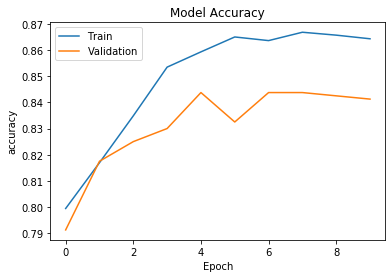

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

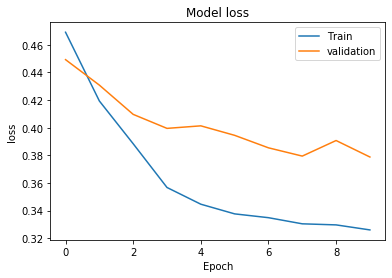

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'],loc = 'upper right')
plt.show()